In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from kuma_llm_utils.llm import (
    OpenAIClient, OpenAIVisionWorker, 
    AnthropicClient, AnthropicVisionWorker,
    GoogleAIClient, GoogleAIVisionWorker)

In [3]:
import os

os.environ['ANTHROPIC_API_KEY'] = "ENTER_YOUR_API_KEY"
os.environ['OPENAI_API_KEY'] = "ENTER_YOUR_API_KEY"
os.environ['GOOGLE_AI_API_KEY']= "ENTER_YOUR_API_KEY"

# Load clients

In [4]:
openai_engine = OpenAIClient()
anthropic_engine = AnthropicClient()
google_engine = GoogleAIClient()

# Define the task

In [5]:
sample_prompt = '''\
Answer to the following questions based on the attached image:
1. {question1}
2. {question2}
'''

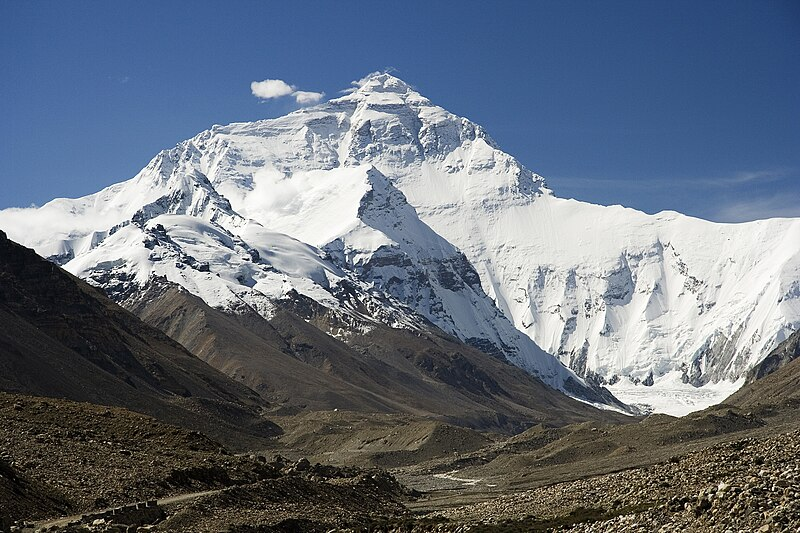

In [6]:
import io
import requests
from PIL import Image

Image.open(io.BytesIO(requests.get(
    'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg').content))

In [7]:
openai_worker = OpenAIVisionWorker(
    engine=openai_engine, 
    prompt_template=sample_prompt,
    generation_params={'model': 'gpt-4o'})

anthropic_worker = AnthropicVisionWorker(
    engine=anthropic_engine, 
    prompt_template=sample_prompt,
    generation_params={'model': 'claude-3-5-sonnet-latest', 'max_tokens': 256})

gemini_worker = GoogleAIVisionWorker(
    engine=google_engine, 
    prompt_template=sample_prompt,
    generation_params={'model': 'gemini-2.0-flash-exp'})

# Generate!
You can pass either url, local path, or PIL.Image object.

In [8]:
print(await openai_worker.generate([{
    'question1': 'What is the mountain in the image?',
    'question2': 'How tall is the mountain in the image?',
    'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'}]))

2025-01-28 16:19:33,480 - 77   - INFO     - OpenAIClient |  gpt-4o {'request': 1, 'token': 366}


1. The mountain in the image is Mount Everest.
2. Mount Everest is approximately 8,848 meters (29,029 feet) tall.


In [9]:
print(await anthropic_worker.generate([{
    'question1': 'What is the mountain in the image?',
    'question2': 'How tall is the mountain in the image?',
    'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'}]))

2025-01-28 16:19:37,548 - 83   - INFO     - AnthropicClient |  claude-3-5-sonnet-latest {'request': 1, 'input_token': 624, 'output_token': 130}


1. The mountain in the image is Mount Everest, the highest mountain on Earth. The image shows its distinctive north face as viewed from Tibet.

2. Mount Everest has an elevation of 29,029 feet (8,848 meters) above sea level. This height was most recently verified in 2020, though some measurements may vary slightly depending on factors like snow cover and tectonic activity.

The image shows the mountain's famous snow-covered peak and steep faces, with the characteristic rocky terrain and glacial valleys at its base that are typical of the Himalayan range.


In [10]:
print(await gemini_worker.generate([{
    'question1': 'What is the mountain in the image?',
    'question2': 'How tall is the mountain in the image?',
    'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'}]))

2025-01-28 16:19:41,822 - 70   - INFO     - GoogleAIClient |  gemini-2.0-flash-exp {'request': 1, 'input_token': 294, 'output_token': 76}
INFO:default:GoogleAIClient |  gemini-2.0-flash-exp {'request': 1, 'input_token': 294, 'output_token': 76}


Certainly! Based on the image you sent:

1.  **What is the mountain in the image?**
The mountain in the image is Mount Everest.

2.  **How tall is the mountain in the image?**
Mount Everest is approximately 8,848.86 meters (29,031.7 feet) tall.


In [11]:
print(await gemini_worker.generate([{
    'question1': 'What is the mountain in the image?',
    'question2': 'How tall is the mountain in the image?',
    'image1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg',
    'image2': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/MtFuji_FujiCity.jpg/800px-MtFuji_FujiCity.jpg'
}]))

2025-01-28 16:19:46,398 - 70   - INFO     - GoogleAIClient |  gemini-2.0-flash-exp {'request': 1, 'input_token': 552, 'output_token': 150}
INFO:default:GoogleAIClient |  gemini-2.0-flash-exp {'request': 1, 'input_token': 552, 'output_token': 150}


Certainly!

Based on the images you've sent:

**Image 1:**

1. **What is the mountain in the image?** The mountain in the first image is Mount Everest.

2. **How tall is the mountain in the image?** Mount Everest is approximately 8,848.86 meters (29,031.7 feet) tall.

**Image 2:**
1. **What is the mountain in the image?** The mountain in the second image is Mount Fuji.

2. **How tall is the mountain in the image?** Mount Fuji is approximately 3,776.24 meters (12,389 feet) tall.
